<a href="https://colab.research.google.com/github/AnnaVeller/detect-license-plates/blob/master/Detect_license_plates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install asyncio

In [3]:
!pip install cython
!pip install matplotlib
!pip install setuptools
!pip install numpy
!pip install Keras==2.2.*
!pip install imgaug
#!pip install tensorflow==1.15.2
!pip install opencv_python
!pip install imutils
!pip install scikit_image
!pip install jupyter

!pip install GitPython
!pip install pycocotools
!pip install tqdm

     |████████████████████████████████| 337kB 2.8MB/s 
     |████████████████████████████████| 51kB 4.0MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 163kB 2.7MB/s 
     |████████████████████████████████| 71kB 6.2MB/s 


In [4]:
!pip install Nomeroff-net-gpu

     |████████████████████████████████| 51kB 1.7MB/s 
     |████████████████████████████████| 320.4MB 47kB/s 


In [5]:
!pip install mrcnn

     |████████████████████████████████| 61kB 1.8MB/s 
  Created wheel for mrcnn: filename=mrcnn-0.2-cp36-none-any.whl size=54932 sha256=516a970639522557cd8ca15ca082bbb266c3aa5a679fa373874e6ab4d91b102a
  Stored in directory: /root/.cache/pip/wheels/11/ed/28/e550ddc897c04c336b923eae4eb35c9aae993d20ce39d9cc40
Successfully built mrcnn


In [6]:
!pip install tensorflow-gpu==1.15.2

     |████████████████████████████████| 411.0MB 43kB/s 
     |████████████████████████████████| 3.8MB 39.3MB/s 
     |████████████████████████████████| 512kB 36.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=9826895aab94819641fc2e659988778071743fc3b0df72fb99b3371e3f392705
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensor

In [7]:
import os
import numpy as np
import sys
import matplotlib.image as mpimg
from matplotlib import pyplot as plt

In [8]:
NOMEROFF_NET_DIR = os.path.abspath("/content/")
MASK_RCNN_DIR = os.path.join(NOMEROFF_NET_DIR, 'Mask_RCNN')
MASK_RCNN_LOG_DIR = os.path.join(NOMEROFF_NET_DIR, 'logs')
sys.path.append(NOMEROFF_NET_DIR)
from NomeroffNet import filters, RectDetector, TextDetector, OptionsDetector, Detector, textPostprocessing, textPostprocessingAsync

# Initialize npdetector with default configuration file.
nnet = Detector(MASK_RCNN_DIR, MASK_RCNN_LOG_DIR)
nnet.loadModel("latest")

rectDetector = RectDetector()

optionsDetector = OptionsDetector()
optionsDetector.load("latest")

# Initialize text detector.
textDetector = TextDetector.get_static_module("ru")()
textDetector.load("latest")

Using TensorFlow backend.
mask_rcnn_numberplate_0640_2019_06_24.h5: 256MB [17:00, 251kB/s]                           



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.






numberplate_options_2019_06_27.h5: 78.7MB [04:58, 263kB/s]                            


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


anpr_ocr_ru_3-cpu.h5: 19.5MB [01:21, 238kB/s]                            


/usr/local/lib/python3.6/dist-packages/NomeroffNet/Base/OCR.py:195: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("th..., outputs=Tensor("so...)`
  self.MODEL = Model(input=net_inp, output=net_out)


In [13]:
files = os.listdir("/content/test")
files.sort()
names = list(map(lambda x: os.path.splitext(x)[0], files))
pic = list(map(lambda x: "/content/test/" + x, files))
print(pic)
print(names)

['/content/test/E268XE123.jpg']
['E268XE123']


In [54]:
!rm -rf /content/test
!mkdir test
%cd test/
from google.colab import files
uploaded = files.upload()
pic = []
names = []
for fn in uploaded.keys():
  print('User uploaded file «{name}» with length {length} bytes'.format(
  name=fn, length=len(uploaded[fn])))
  pic.append("/content/test/" + fn)
  names.append(os.path.splitext(fn)[0])
print(pic)
print(names)
%cd ../ 

/content/test


Saving A001MP05.jpg to A001MP05.jpg
User uploaded file «A001MP05.jpg» with length 113341 bytes
['/content/test/A001MP05.jpg']
['A001MP05']
/content


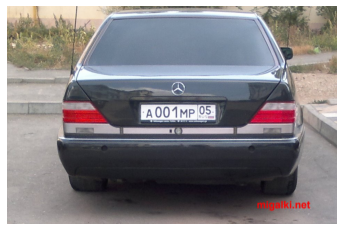

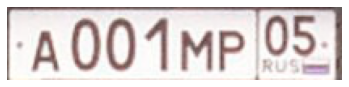

real:  A001MP05
predict:  ['A001MP05'] True





In [55]:
right_detect = 0
for i in range(len(pic)):
    img_path = pic[i]
    # Detect numberplate
    img = mpimg.imread(img_path)
    NP = nnet.detect([img])

    # Generate image mask.
    cv_img_masks = filters.cv_img_mask(NP)

    # Detect points.
    arrPoints = rectDetector.detect(cv_img_masks)
    zones = rectDetector.get_cv_zonesBGR(img, arrPoints)

    # find standart
    regionIds, stateIds, countLines = optionsDetector.predict(zones)
    regionNames = optionsDetector.getRegionLabels(regionIds)

    # find text with postprocessing by standart
    textArr = textDetector.predict(zones)
    textArr = textPostprocessing(textArr, regionNames)
    state = False
    for k in range(len(textArr)):
        if names[i] == textArr[k]:
            state = True
            right_detect = right_detect + 1
    plt.axis("off")
    plt.imshow(img)
    plt.show()
    #print(arrPoints)
    for zone, points in zip(zones, arrPoints):
            plt.axis("off")
            plt.imshow(zone)
            plt.show()  
    print("real: ", names[i])
    print("predict: ", textArr, state)
    print('\n\n')

In [56]:
print(" right detect  | %d\n ---------------------\n all detect    | %d\n ---------------------\n right percent | %f"
%(right_detect,len(pic),right_detect/len(pic)*100),"%") 

 right detect  | 1
 ---------------------
 all detect    | 1
 ---------------------
 right percent | 100.000000 %
